### Trabalho: Transformada de Laplace

Aluno: João Mário Carnieletto Izoton Lago
<br/>
Curso: Engenharia Eletronica 2023.1
<br/>
Sinais e Sistemas

O código completo pode ser encontrado no link:
[https://github.com/JoaoMario109/sinais-e-sistemas](https://github.com/JoaoMario109/sinais-e-sistemas)
Recomenda-se que se clone / baixe o repositório acima na sua máquina para execução deste, bem como que se instale previamente python e as bibliotecas requeridas numpy, control, matplotlib, scipy. Caso esses passos não sejam atendidos, podem ocorrer erros durante a execução bem como um comportamento não esperado do código.

Requisitos do trabalho:
* Criação de um script para a visualização do diagrama de polos e zeros de um sistema
* O script deve aceitar uma função de transferência inserida pelo usuário no codigo
* Com base nessa função deve ser possivel visualizar o diagrama de polos e zeros bem como um gráfico 3D de magnitude e um gráfico 2D do corte sigma igual a zero

Objetivos:
* Desenvolver um script em python que aceita uma função de trânsferência qualquer de um sistema e com base nela realiza o plot de 3 gráficos:
  * Um diagrama de polos e zeros do sistema
  * Um plot 3D de magnitude
  * Um plot 2D do corte sigma igual a zero
* Realizar o código de forma o mais simples o possível utilizando bibliotecas para facilitar a compreensão do leitor e ser mais direto ao ponto o possível
* Apresentação dos resultados do código bem como escolha de um caso específico a ser analisado e seus respectivos resultados.
* Breve análise e conclusão dos resultados obtidos

OBS: Como um dos pontos é a análise da transformada de laplace de um sistema em específico, foi decidido por utilizar o desenvolvimento do código com esse sistema ja escrito.

O sistema escolhido é definido por
$$
y' + 3y = f(t)
$$
Aplicando a transformada de laplace em ambos os lados obtemos
$$
sY(s) + 3Y(s) = F(s)
\\
H(s) = \frac{Y(s)}{F(s)}
$$
Logo a função de transferência utilizada e analisada é
$$
H(s) = \frac{1}{(s + 3)}
$$

Notas importantes sobre a o código:
* O código tenta acertar os limites de observação dos plots usando as coordenadas máximas e minimas dos polos e zeros no plano imaginário - real
* Com base nisso o plot se limitas até as proximidades desses valores, para algumas funções onde existem apenas um único polo ou zero, é interessante que se aumente o fator de ajuste que multiplica os limites, isso vai ajudar a aumentar a região de observação, pois nesses casos o plot pode ficar limitado apenas as proximidades do polo ou zero em questão

### Deselvolvimento do código

In [2]:
# Packages install
%pip install -q numpy control matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# OS
import os
# Análise numérica
import numpy as np
import control
# Plots
import matplotlib.pyplot as plt
# Tipagem
from typing import List, Tuple

In [4]:
# Definição de algumas funções de utilidade geral

# Encontra o ponto central dentre um conjunto de pontos
def get_middle_point(points: List[ complex ]) -> Tuple[ float, float ]:
	latitudes = np.real(points)
	longitudes = np.imag(points)
	return [ sum(latitudes) / len(latitudes), sum(longitudes) / len(longitudes) ]

# Garante que o repositório de saída exista
if not os.path.isdir("./assets/outputs"):
	os.makedirs("./assets/outputs")

### Definição da função de transferência do sistema

In [5]:
# É dado a liberdade para se escolher os coeficientes dos polinômios do
# numerador e denominador da função de transferência, por exemplo:
#
# H(s) = (A * s² + B * s + C) / (D * s² + E * s + F)
#
# Utilize a seguinte definição para num e div
#
# num = [A, B, C]
# div = [D, E, F]
#
# Para o sistema desejado
#
# H(s) = 1 / (s + 3)
#
# num = [1]
# div = [1, 3]
num = [1]
div = [1, 3]

# Criação da instância do obj da função de trasnferência
sys = control.TransferFunction(num, div)

### Plot do diagrama de polos e zeros

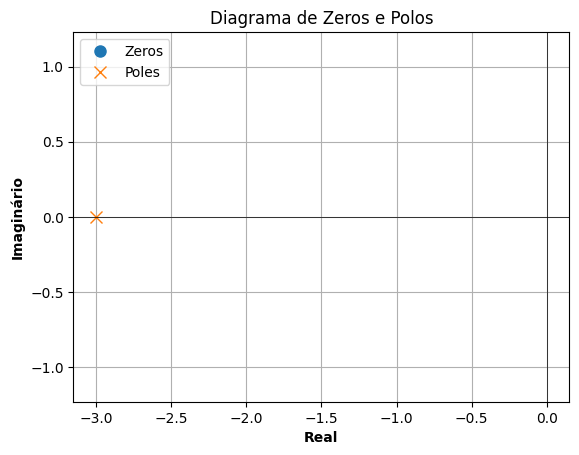

In [6]:
# Encontra os zeros e polos
zeros = control.zero(sys)
poles = control.pole(sys)

# Plota os zeros com marcador O e polos com marcador X
plt.plot(np.real(zeros), np.imag(zeros), "o", markersize = 8, label = "Zeros")
plt.plot(np.real(poles), np.imag(poles), "x", markersize = 8, label = "Poles")

# Determina a nomenclatura dos eixos e título do plot
plt.xlabel('Real', weight = "bold")
plt.ylabel('Imaginário', weight = "bold")
plt.title('Diagrama de Zeros e Polos')

# Ativa legenda e grid
plt.legend()
plt.grid(True)

# Adiciona as linhas centrais de referência
plt.axhline(0, color = "black", linewidth = 0.5)
plt.axvline(0, color = "black", linewidth = 0.5)

# Traça eixos com escalas iguais
plt.axis("equal")

# Salva como um arquivo
plt.savefig("./assets/outputs/poles_and_zeros.png")

# Mostra resultado
plt.show()

### Plot de magnetude da função de transferência

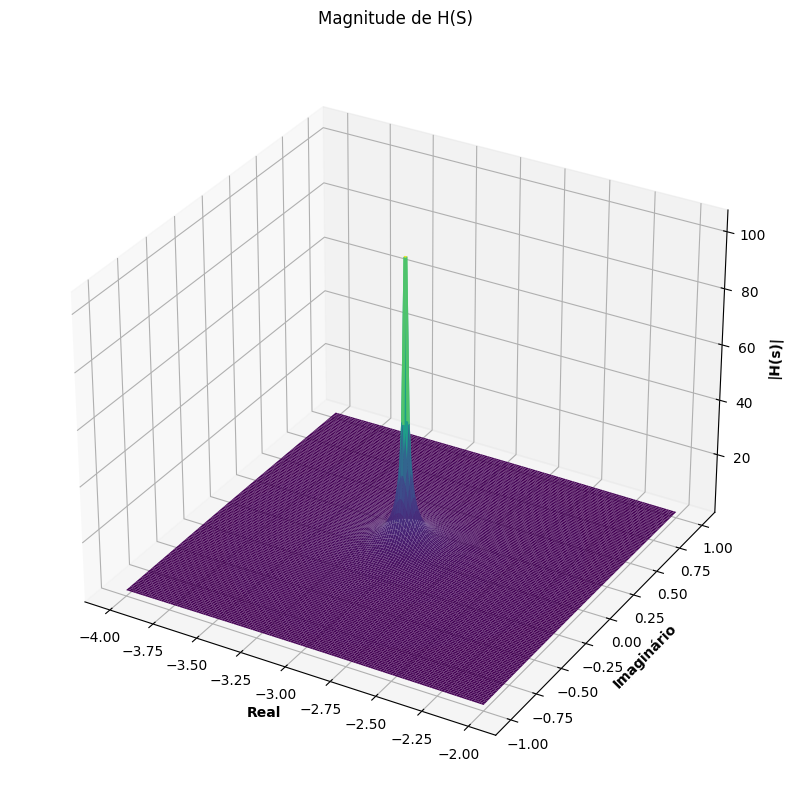

In [7]:
# Encontra os limites adequados
middle_x, middle_y = get_middle_point(np.concatenate([ zeros, poles ]))

# Fator de ajuste para limites, se o gráfico estiver muito focado, aumente
delta = 1

# Cria a distribuição de valores nos eixos X e Y
x = np.linspace(middle_x - delta, middle_x + delta, 150)
y = np.linspace(middle_y - delta, middle_y + delta, 150)

# Cria um mesh grid para o plot
X, Y = np.meshgrid(x, y)
# Inicia o plot com zero
Z = np.zeros_like(X)

# Faz a avaliação da função pelo grid
for i in range(len(x)):
	for j in range(len(y)):
		s = X[i, j] + Y[i, j] * 1j
		Z[i, j] = np.abs(control.evalfr(sys, s))

# Cria um objeto de plot 3D e configura a view box
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = "3d")
ax.set_box_aspect(aspect = None, zoom = 0.95)
ax.grid()

# Configura os nomes dos eixos e título
ax.set_title("Magnitude de H(S)")
ax.set_xlabel("Real", weight = "bold")
ax.set_ylabel("Imaginário", weight = "bold")
ax.set_zlabel("|H(s)|", weight = "bold")

# Faz o plot da superficie usando viridis de color map
ax.plot_surface(X, Y, Z, rstride = 1,  cstride = 1, cmap = "viridis", edgecolor = "none")

# Salva como um arquivo
plt.savefig("./assets/outputs/magnitude.png")

# Mostra resultado
plt.show()

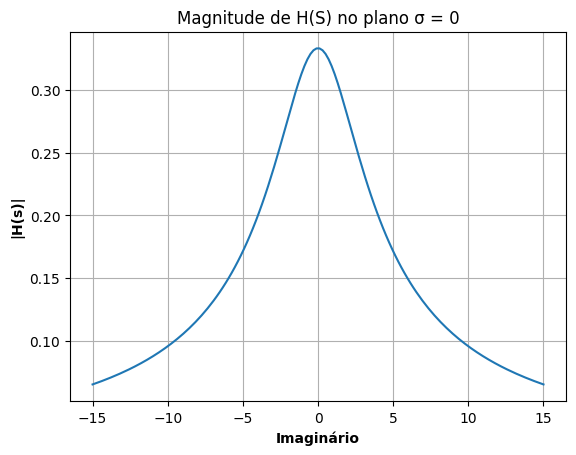

In [9]:
# Encontra os limites adequados
middle_x, middle_y = get_middle_point(np.concatenate([ zeros, poles ]))

# Fator de ajuste para limites, se o gráfico estiver muito focado, aumente
delta = 15

# Cria disposição de valores para o eixo X
X = np.linspace(middle_y - delta, middle_y + delta, 150)

# Inicia com zeros o Y
Y = np.zeros_like(X)

# Calcula a função de transferência para o plano sigma igual a zero
for j in range(len(X)):
	s = 0 + X[j] * 1j
	Y[j] = np.abs(control.evalfr(sys, s))

# Cria a figura e o plot e ativa o grid
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()

# Plot the surface
ax.plot(X, Y)
ax.set_title("Magnitude de H(S) no plano σ = 0")
ax.set_xlabel("Imaginário", weight = "bold")
ax.set_ylabel("|H(s)|", weight = "bold")

# Salva como um arquivo
plt.savefig("./assets/outputs/magnitude_sigma_zero.png")

# Show the plot
plt.show()

### Resultados

#### Sistema em questão análisado

O sistema escolhido é definido por
$$
y' + 3y = f(t)
$$
Sua função de transferência é dada por
$$
H(s) = \frac{1}{(s + 3)}
$$

#### Plots

**Diagrama de polos e zeros**

<img src="./assets/default/poles_and_zeros.png" />

**Plot de magnitude**

<img src="./assets/default/magnitude.png" />

**Plot de magnitude corte sigma = 0**

<img src="./assets/default/magnitude_sigma_zero.png" />

### Análise

Como esperado, o sistema analisado se trata de um sistema de primeira ordem, logo sua função de transferência é definida na forma:
$$
y' + ay = f(t)
\\
F(s) = \frac{1}{s + a}
$$

Realizando a análise da função de transferência em questão, chegamos na conclusão que essa função deve possuir apenas um polo devido ao fato de apenas quando o denominador zerar esta função se encaminhar para o infinito, ja quanto a zeros, pode-se analisar que a função apenas irá ser zero quando s tender a infinito, logo esses zeros não irão se manifestar.

Como mencionado acima, pode-se inferir no diagrama de polos e zeros apenas a existência de um único polo como esperado e no gráfico de magnitude pode-se verificar esse polo com mais detalhes.

Dos limites analisados, fazer essa definição é de suma importância, por isso deve-se ser cauteloso quando analisando tais funções, o código em questão tenta encontrar os limites adequados, mas tenha em mente que esse código foi otimizado para a função de transferência em questão.

A forma como os limites são encontrados é feita usando o ponto central entre os polos e zeros, logo o código analisa o ponto central entre os polos e zeros da função de transferência e usa esse ponto com um dado delta para ser os limites analisados, vale ressaltar que o delta é manual e deve ser ajustado pelo usuário no código em questão, o codigo irá centralizar a análise dos gráfico, mas o ajuste de qual área deve ser analisada é realizado pelo usuário ajustando a variavel *delta* no código. Existe uma maneira simples de ajustar isso automaticamente utilizando um *squareform* dos pontos e capturando as bordas, porém por viés de simplicidade e por a matéria não conver o quesito de fazer códigos mais complexos, foi optado por deixar o usário ajustar o delta.

Outra observação a ser mencionada é o quanto ao corte sigma igual a zero, que representa a análise do sistema à uma excitação de entrada real. Como pode se observar era esperado que existisse um pico na região central do gráfico, pois se trata de um corte do gráfico de magnitude que como é claro apresenta o pico. Isso se deve ao fator de que a resolução da análise é pequena e não pega esses valores extremos, além que ao se plotar com um zoom mais definido esses valores se tornam opacos ao gráfico.

<hr/>

Da execução do código e de suas saídas.

O código foi feito utilizando python com auxilio das bibliotecas numpy, control, matplotlib, scipy. Logo tenha certeza de ter um ambiente de execução com todos esses requisitos instalados propriamente.

O código esta apresentado como um jupyter notebook para permitir que o usuário execute parte a parte e faça interações com o código de forma mais simples, porém no final do trabalho é apresentado uma versão completa que apenas salva as imagens em uma pasta de saída.

Dos diretórios de saída, o codigo espera que as saídas sejam armazenadas em um diretório *assets/outputs* relativo ao caminho de execução. Se esse código foi clonado do github como recomendado, isso já será existente.

O código completo pode ser encontrado no link:
[https://github.com/JoaoMario109/sinais-e-sistemas](https://github.com/JoaoMario109/sinais-e-sistemas)

<hr/>

### Código completo para execução única

In [ ]:
# Análise numérica
import numpy as np
import control
# Plots
import matplotlib.pyplot as plt
# Tipagem
from typing import List, Tuple

# Definição de algumas funções de utilidade geral

# Encontra o ponto central dentre um conjunto de pontos
def get_middle_point(points: List[ complex ]) -> Tuple[ float, float ]:
	latitudes = np.real(points)
	longitudes = np.imag(points)
	return [ sum(latitudes) / len(latitudes), sum(longitudes) / len(longitudes) ]

# É dado a liberdade para se escolher os coeficientes dos polinômios do
# numerador e denominador da função de transferência, por exemplo:
#
# H(s) = (A * s² + B * s + C) / (D * s² + E * s + F)
#
# Utilize a seguinte definição para num e div
#
# num = [A, B, C]
# div = [D, E, F]
#
# Para o sistema desejado
#
# H(s) = 1 / (s + 3)
#
# num = [1]
# div = [1, 3]
num = [1]
div = [1, 3]

# Criação da instância do obj da função de trasnferência
sys = control.TransferFunction(num, div)

# Encontra os zeros e polos
zeros = control.zero(sys)
poles = control.pole(sys)

# Plota os zeros com marcador O e polos com marcador X
plt.plot(np.real(zeros), np.imag(zeros), "o", markersize = 8, label = "Zeros")
plt.plot(np.real(poles), np.imag(poles), "x", markersize = 8, label = "Poles")

# Determina a nomenclatura dos eixos e título do plot
plt.xlabel('Real', weight = "bold")
plt.ylabel('Imaginário', weight = "bold")
plt.title('Diagrama de Zeros e Polos')

# Ativa legenda e grid
plt.legend()
plt.grid(True)

# Adiciona as linhas centrais de referência
plt.axhline(0, color = "black", linewidth = 0.5)
plt.axvline(0, color = "black", linewidth = 0.5)

# Traça eixos com escalas iguais
plt.axis("equal")

# Salva como um arquivo
plt.savefig("./assets/outputs/poles_and_zeros.png")

# Encontra os limites adequados
middle_x, middle_y = get_middle_point(np.concatenate([ zeros, poles ]))

# Fator de ajuste para limites, se o gráfico estiver muito focado, aumente
delta = 1

# Cria a distribuição de valores nos eixos X e Y
x = np.linspace(middle_x - delta, middle_x + delta, 150)
y = np.linspace(middle_y - delta, middle_y + delta, 150)

# Cria um mesh grid para o plot
X, Y = np.meshgrid(x, y)
# Inicia o plot com zero
Z = np.zeros_like(X)

# Faz a avaliação da função pelo grid
for i in range(len(x)):
	for j in range(len(y)):
		s = X[i, j] + Y[i, j] * 1j
		Z[i, j] = np.abs(control.evalfr(sys, s))

# Cria um objeto de plot 3D e configura a view box
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = "3d")
ax.set_box_aspect(aspect = None, zoom = 0.95)
ax.grid()

# Configura os nomes dos eixos e título
ax.set_title("Magnitude de H(S)")
ax.set_xlabel("Real", weight = "bold")
ax.set_ylabel("Imaginário", weight = "bold")
ax.set_zlabel("|H(s)|", weight = "bold")

# Faz o plot da superficie usando viridis de color map
ax.plot_surface(X, Y, Z, rstride = 1,  cstride = 1, cmap = "viridis", edgecolor = "none")

# Salva como um arquivo
plt.savefig("./assets/outputs/magnitude.png")

# Encontra os limites adequados
middle_x, middle_y = get_middle_point(np.concatenate([ zeros, poles ]))

# Fator de ajuste para limites, se o gráfico estiver muito focado, aumente
delta = 15

# Cria disposição de valores para o eixo X
X = np.linspace(middle_y - delta, middle_y + delta, 150)

# Inicia com zeros o Y
Y = np.zeros_like(X)

# Calcula a função de transferência para o plano sigma igual a zero
for j in range(len(X)):
	s = 0 + X[j] * 1j
	Y[j] = np.abs(control.evalfr(sys, s))

# Cria a figura e o plot e ativa o grid
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()

# Plot the surface
ax.plot(X, Y)
ax.set_title("Magnitude de H(S) no plano σ = 0")
ax.set_xlabel("Imaginário", weight = "bold")
ax.set_ylabel("|H(s)|", weight = "bold")

# Salva como um arquivo
plt.savefig("./assets/outputs/magnitude_sigma_zero.png")